In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
! unzip /content/drive/MyDrive/copy-of-regression-with-anns.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/copy-of-regression-with-anns.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
print(len(train_df))
print(train_df.columns)

294537
Index(['Unnamed: 0', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press',
       'DewP', 'Rain', 'WinDir', 'WinSpeed', 'Station'],
      dtype='object')


Checking Varience inflation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(train_df, i) for i in range(train_df.shape[1])]
vif['Features'] = train_df.columns

vif # NO2 CO Temp Press

,VIF,Features
0,3.999659,Unnamed: 0
1,6.203986,PM2.5
2,2.610409,SO2
3,8.949675,NO2
4,7.151891,CO
5,4.664123,O3
6,15.857738,Temp
7,19.352598,Press
8,6.002003,DewP
9,1.029381,Rain


<ipython-input-6-9ee13fba2edb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SO2'], kde=False, hist_kws={"alpha": 0.5}, label='PM2.5')


<Axes: xlabel='SO2'>

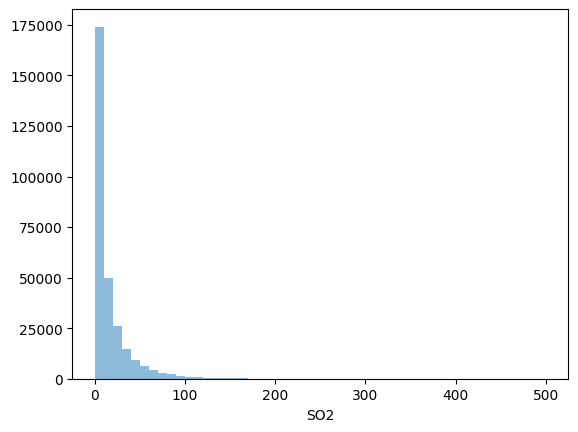

In [ ]:
sns.distplot(train_df['SO2'], kde=False, hist_kws={"alpha": 0.5}, label='PM2.5')

<function matplotlib.pyplot.show(close=None, block=None)>

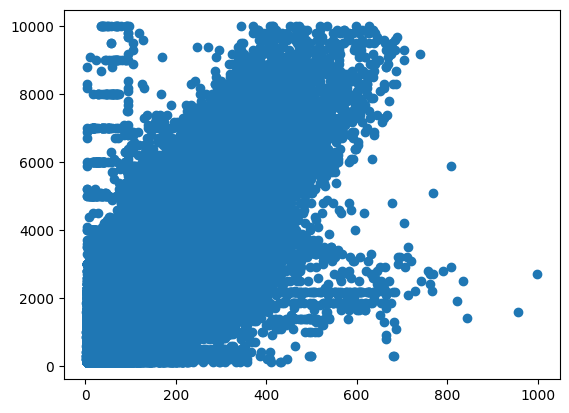

In [ ]:
plt.scatter(train_df['PM2.5'],train_df['CO'],label='So2 vs PM2.5')
plt.show

In [ ]:
sns.distplot(train_df['SO2'])

Averaging Target For Same Feature

In [ ]:
import numpy as np
train_df.head()
print("Old Shape: ", train_df.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = train_df['PM2.5'].quantile(0.25)
Q3 = train_df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(train_df['PM2.5'] >= upper)[0]
lower_array = np.where(train_df['PM2.5'] <= lower)[0]

# Removing the outliers
train_df.drop(index=upper_array, inplace=True)
train_df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", train_df.shape)

Old Shape:  (294537, 13)
New Shape:  (279828, 13)


Outlier Removal For Feature

In [ ]:
Q1 = train_df['SO2'].quantile(0.25)
Q3 = train_df['SO2'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array1 = np.where(train_df['SO2'] >= upper)[0]
lower_array1 = np.where(train_df['SO2'] <= lower)[0]
print(len(upper_array ))
print(len(lower_array))
# Removing the outliers
#train_df.drop(index=upper_array1, inplace=True)
#train_df.drop(index=lower_array1, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", train_df.shape)

14709
0
New Shape:  (279828, 13)


In [ ]:
train_df.head()

In [ ]:
train_df.describe()

<Axes: >

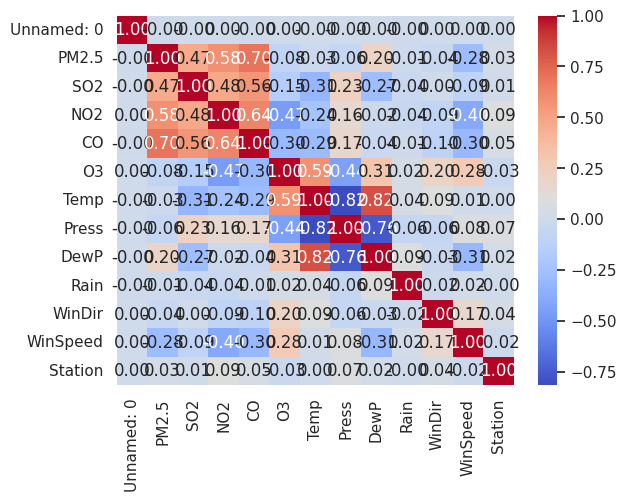

In [ ]:
import seaborn as sns
cor_matrix = train_df.corr()
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
correlations = train_df.corr()['PM2.5'].abs()
sorted_cr = correlations.sort_values(ascending=False)
print(sorted_cr)

PM2.5         1.000000
CO            0.698595
NO2           0.584224
SO2           0.466812
WinSpeed      0.278087
DewP          0.200517
O3            0.083031
Press         0.059031
WinDir        0.044297
Temp          0.027256
Station       0.027048
Rain          0.008887
Unnamed: 0    0.001362
Name: PM2.5, dtype: float64


In [ ]:
degree = 2

# Create polynomial features for each feature
poly_features = {}
for feature in train_df.columns[:-1]:  # Exclude the target variable
    poly_coefficients = np.polyfit(train_df[feature], train_df['PM2.5'], degree)
    poly_values = np.polyval(poly_coefficients, train_df[feature])
    poly_features[feature] = poly_values

# Create a DataFrame with polynomial features
df_poly = pd.DataFrame(poly_features)

# Calculate correlations with the target variable
correlations = df_poly.corr()['PM2.5'].abs()

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)
print(sorted_correlations,sorted_cr)

PM2.5         1.000000
CO            0.749381
NO2           0.584537
SO2           0.485226
WinSpeed      0.282941
DewP          0.248935
O3            0.208763
Press         0.139186
WinDir        0.075545
Temp          0.034773
Rain          0.016520
Unnamed: 0    0.001609
Name: PM2.5, dtype: float64 PM2.5         1.000000
CO            0.698595
NO2           0.584224
SO2           0.466812
WinSpeed      0.278087
DewP          0.200517
O3            0.083031
Press         0.059031
WinDir        0.044297
Temp          0.027256
Station       0.027048
Rain          0.008887
Unnamed: 0    0.001362
Name: PM2.5, dtype: float64


# Creation Of Feature And Target Data Set

In [ ]:
X_train_raw = train_df.drop(['PM2.5','Unnamed: 0',	'O3',	'Temp',	'Press',	'DewP',	'Rain',	'WinDir', 'WinSpeed',	'Station'] ,axis=1)
X_train_raw = train_df.drop(['PM2.5','Unnamed: 0',	'O3',	'Temp',	'Press',	'Rain',	'WinDir',	'Station'] ,axis=1)
X_train_raw = train_df.drop(['PM2.5','Unnamed: 0', 'NO2', 'CO', 'Temp', 'Press'] ,axis=1)
X_train_raw = train_df.drop(['PM2.5','Unnamed: 0'] ,axis=1)
y_train_raw = train_df['PM2.5']
X_pred = test_df.drop(['Unnamed: 0', 'O3',	'Temp',	'Press',	'DewP',	'Rain',	'WinDir', 'WinSpeed',	'Station'] ,axis=1)
X_pred = test_df.drop(['Unnamed: 0',	'O3',	'Temp',	'Press',	'Rain',	'WinDir',	'Station'] ,axis=1)
X_pred_raw = test_df.drop(['Unnamed: 0', 'NO2', 'CO', 'Temp', 'Press'] ,axis=1)
X_pred_raw = test_df.drop(['Unnamed: 0'] ,axis=1)
#X_train_raw.head()


In [ ]:
from scipy import stats
import numpy as np
print(len(X_train_raw))

z_scores = stats.zscore(X_train_raw)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
#print(abs_z_scores)
X_train_raw['outliers']= outliers
X_train_raw.drop(index=outliers, inplace=True)
print(len(X_train_raw))
"Machine Learning Models:"

"Use anomaly detection models, such as isolation forests or one-class SVMs, to automatically identify outliers."

In [ ]:
Q1 = X_train_raw.quantile(0.25)
Q3 = X_train_raw.quantile(0.75)
IQR = Q3 - Q1
outliers1 = ((X_train_raw < (Q1 - 1.5 * IQR)) | (X_train_raw > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers1.head())


In [ ]:
selected_features = ['CO', 'NO2', 'SO2', 'WinSpeed']

poly = PolynomialFeatures(degree=degree, include_bias=False)
poly_features = poly.fit_transform(train_df[selected_features])
print(poly_features[0])
#poly_df = pd.DataFrame(poly_features, columns=[f'{feature}_degree{deg}' for feature in selected_features for deg in range(1, degree + 1)])
X_train_Poly = poly_features
poly_features_test = poly.fit_transform(test_df[selected_features])
X_pred_Poly = poly_features_test
#df = pd.concat([train_df, poly_df], axis=1)

[2.00e+02 1.00e+01 2.00e+00 3.10e+00 4.00e+04 2.00e+03 4.00e+02 6.20e+02
 1.00e+02 2.00e+01 3.10e+01 4.00e+00 6.20e+00 9.61e+00]


# Split Train Test Data Set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X_train_raw,y_train_raw,test_size=0.3,random_state=42)
Scaler = StandardScaler()
Scaler.fit(X_train_raw)
X_train_trans = Scaler.transform(X_train)
X_test_trans = Scaler.transform(X_test)
y_train_trans = np.array(y_train)
y_test_trans = np.array(y_test)
X_pred_trans = Scaler.transform(X_pred_raw)

In [ ]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
import tqdm as tqdm
import torch
import copy

X_train_torch = torch.tensor(X_train_trans, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_trans, dtype=torch.float32).reshape(-1, 1)
X_test_torch = torch.tensor(X_test_trans, dtype=torch.float32)
y_test_torch = torch.tensor(y_test_trans, dtype=torch.float32).reshape(-1,1)
X_pred_torch = torch.tensor(X_pred_trans, dtype=torch.float32)
#print(X_test_torch.numpy()[:10])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_size = X_train_torch.shape[1]
model = Sequential()
model.add(Dense(50, input_dim=X_train_torch.shape[-1], activation= "relu"))
model.add(Dense(150, activation= "relu"))
model.add(Dense(100, activation= "tanh"))
model.add(Dense(50, activation= "relu"))
#model.add(Dense(50, activation= "relu"))
#model.add(Dense(16, activation= "relu"))
model.add(Dense(1))                         # 50,150,100,50,50

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="mean_squared_error",optimizer = Adam(learning_rate=0.01))
#model.compile(loss='mean_absolute_error', optimizer='adam',metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                600       
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 dense_12 (Dense)            (None, 100)               15100     
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 28451 (111.14 KB)
Trainable params: 28451 (111.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_trans,y_train_trans,epochs=50)

Epoch 1/50
1568/6122 [======>.......................] - ETA: 16s - loss: 2413.1426

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_trans,y_test_trans)

2624/2624 [==============================] - 4s 2ms/step - loss: 953.7250


953.7249755859375

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
pred2=model.predict(X_test_trans)
r2_score(y_test_trans,pred2)
mse = mean_squared_error(y_test,pred2)
print(mse)

2624/2624 [==============================] - 8s 3ms/step
953.7257512764847


In [ ]:
y_pred_Keras = model.predict(X_pred_trans)


In [ ]:
A = []
for i in range (len(y_pred_Keras)):
  A.append(y_pred_Keras[i][0])
Export = pd.DataFrame({'ID': range(0, len(A)), 'PM2.5': A})
Export.to_csv('/content/drive/MyDrive/Regression_ANN_keras.csv', index=False)

In [ ]:
print(y_pred_Keras[1][0])

147.66101


In [ ]:
input_size = X_train_torch.shape[1]
model = nn.Sequential(
    nn.Linear(input_size, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [ ]:

model = nn.Sequential(
    nn.Linear(11, 512),
    nn.ReLU(),

  #  nn.Linear(1024, 512),
  #  nn.ReLU(),

    nn.Linear(512, 256),
    nn.ReLU(),

    nn.Linear(256, 128),
    nn.Tanh(),

    nn.Linear(128, 64),
    nn.ReLU(),

    nn.Linear(64, 32),
    nn.ReLU(),

    nn.Linear(32, 16),
    nn.ReLU(),

    nn.Linear(16, 8),
    nn.ReLU(),

    nn.Linear(8, 1)
)


In [ ]:
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

AttributeError: 'Sequential' object has no attribute 'parameters'

In [ ]:
n_epochs = 100   # number of epochs to run
batch_size = 32  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

In [ ]:
best_mse = np.inf   # init to infinity
best_weights = None
history = []
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train_torch[start:start+batch_size]
            y_batch = y_train_torch[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate loss at end of each epoch
    model.eval()
    y_pred = model(X_test_torch)
    mse = loss_fn(y_pred, y_test_torch)
    print(f"The value MSE after epoch {epoch} is {mse}")
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())


The value MSE after epoch 0 is 895.370849609375


KeyboardInterrupt: 

In [ ]:
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train_torch[start:start+batch_size]
            y_batch = y_train_torch[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate loss at end of each epoch
    model.eval()
    y_pred = model(X_test_torch)
    mse = loss_fn(y_pred, y_test_torch)
    print(f"The value MSE after epoch {epoch} is {mse}")
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
model.eval()
P = []
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(len(X_pred_torch)):
        X_sample = X_pred_torch[i: i+1]
        X_sample = Scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        pred = y_pred[0].numpy()[0]
        #true = y_test_torch[i].numpy()[0]
        pred = round(pred, 2)
        #Pred = int(pred)
        P.append(pred)
        #true = round(true, 2)
        #print("Prediction: " + str(pred) + " Expected: " + str(true))

max_length = max(len(P), len(history))

# Create a DataFrame with 'ID', 'PM2.5', and 'history' using the maximum length
Export_nn = pd.DataFrame({'ID': range(0, max_length), 'PM2.5': [P[i] if i < len(P) else None for i in range(max_length)], 'history': [history[i] if i < len(history) else None for i in range(max_length)]})
Export_nn.to_csv('/content/drive/MyDrive/Regression_ANN_nn1.csv', index=False)

In [ ]:
# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))

MSE: 2120.89
RMSE: 46.05


In [ ]:
model.eval()
P = []
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(len(X_pred_torch)):
        X_sample = X_pred_torch[i: i+1]
        X_sample = Scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        pred = y_pred[0].numpy()[0]
        #true = y_test_torch[i].numpy()[0]
        pred = round(pred, 2)
        #Pred = int(pred)
        P.append(pred)
        #true = round(true, 2)
        #print("Prediction: " + str(pred) + " Expected: " + str(true))

In [ ]:
print(P)
print(len(P))

[15.24, 14.97, 13.86, 14.27, 15.02, 13.45, 15.08, 14.9, 15.59, 13.84, 15.58, 14.87, 14.96, 13.99, 14.39, 15.07, 15.66, 14.55, 14.22, 12.87, 16.08, 13.07, 13.41, 13.94, 13.11, 13.72, 14.95, 13.41, 15.58, 15.02, 13.89, 13.78, 13.4, 13.93, 14.84, 12.9, 15.44, 13.17, 14.93, 15.02, 13.7, 14.02, 15.72, 15.08, 14.94, 15.09, 14.92, 13.69, 13.19, 14.68, 13.99, 14.08, 14.93, 13.62, 14.99, 14.9, 13.11, 14.25, 14.23, 14.89, 14.77, 13.56, 15.09, 15.02, 13.82, 14.91, 13.04, 13.6, 15.02, 14.19, 15.15, 14.85, 15.88, 13.75, 16.64, 14.92, 14.9, 15.15, 14.94, 14.46, 13.04, 16.1, 13.13, 15.02, 15.1, 12.84, 13.83, 13.14, 14.98, 14.19, 15.05, 14.28, 12.94, 14.35, 14.91, 15.05, 13.4, 15.17, 14.33, 13.41, 15.17, 14.55, 13.64, 14.86, 15.18, 15.14, 12.88, 15.02, 15.15, 15.29, 14.03, 13.17, 14.84, 14.32, 15.19, 14.66, 15.13, 13.4, 15.28, 12.97, 15.79, 13.54, 14.94, 15.06, 13.47, 15.6, 13.77, 13.86, 14.5, 15.86, 13.89, 14.92, 15.01, 15.84, 13.29, 14.1, 14.15, 13.24, 14.75, 13.89, 14.86, 15.25, 15.04, 15.44, 14.43

In [ ]:
Export_nn = pd.DataFrame({'ID': range(0, len(P)), 'PM2.5':P, 'history':history})
Export_nn.to_csv('/content/drive/MyDrive/Regression_ANN_nn.csv', index=False)

Linear Regrestion

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model1 = LinearRegression()
model1.fit(X_train_trans, y_train_trans)
y_pred = model1.predict(X_test_trans)
mse = mean_squared_error(y_test_trans, y_pred)
#print(y_pred, y_train_trans)
y_pred_f = model1.predict(X_pred_trans)
print(mse)
rmse = np.sqrt(mse)
print(rmse)



2051.5275327076397
45.29379132626943


Random Forest Regression

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_trans, y_train_trans)
y_pred = rf_regressor.predict(X_test_trans)

mse = mean_squared_error(y_test_trans, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

612.1965168883092
24.742605297104614


# Lasso & Ridge Regression

In [ ]:
from sklearn.linear_model import Lasso, Ridge
lasso_model = Lasso(alpha=0.001)  # alpha is the regularization strength
lasso_model.fit(X_train_trans, y_train_trans)
y_pred_lasso = lasso_model.predict(X_test_trans)
mse = mean_squared_error(y_test_trans, y_pred_lasso)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

ridge_model = Ridge(alpha=0.01)  # alpha is the regularization strength
ridge_model.fit(X_train_trans, y_train_trans)
y_pred_ridge = ridge_model.predict(X_test_trans)
mse = mean_squared_error(y_test_trans, y_pred_ridge)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

# Elastic Net Method

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)

elastic_net_model.fit(X_train_trans, y_train_trans)
y_pred_elastic_net = elastic_net_model.predict(X_test_trans)
mse = mean_squared_error(y_test_trans, y_pred_elastic_net)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

1216.8139037869983
34.882859742099676


# Least Huber Regressio

In [ ]:
from sklearn.linear_model import HuberRegressor
huber_model = HuberRegressor(epsilon=1.35)
huber_model.fit(X_train_trans, y_train_trans)
y_pred_huber = huber_model.predict(X_test_trans)
mse = mean_squared_error(y_test_trans, y_pred_huber)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

1256.35593393507
35.445111566125306


# KNN **Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
knn_reg = KNeighborsRegressor(n_neighbors=50)
knn_reg.fit(X_train, y_train)
y_knn_reg = knn_reg.predict(X_test_trans)
mse = mean_squared_error(y_test_trans, y_knn_reg)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


10591.064854247496
102.91289935789146


In [ ]:
pip install pymc3 numpy pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
(X_train_trans, y_train_trans)
data = pd.DataFrame({'X': X_train_trans, 'y': y_train_trans})

# Plot the data
sns.scatterplot(x='X', y='y', data=data)
plt.title('Synthetic Data with Outliers')
plt.show()

# Bayesian Linear Regression with PyMC3
with pm.Model() as model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)

    # Model
    mu = alpha + beta * X_train_trans
    sigma = pm.HalfNormal('sigma', sd=1)
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=y_train_trans)

    # Sampling
    trace = pm.sample(2000, tune=1000, chains=2)

# Plot posterior distributions
pm.plot_posterior(trace, var_names=['alpha', 'beta', 'sigma'])
plt.show()

In [ ]:
y_pred_rf = rf_regressor.predict(X_pred_trans)
Export = pd.DataFrame({'ID': range(0, len(y_pred_rf)), 'PM2.5':y_pred_rf})
Export.to_csv('/content/drive/MyDrive/Regression_ANNrf.csv', index=False)

print(Export.columns)
Export.head()

Index(['ID', 'PM2.5'], dtype='object')


,ID,PM2.5
0,0,123.8011
1,1,187.4500
2,2,159.2000
3,3,20.6500
4,4,55.9211
